In [ ]:
!kaggle datasets download -d adeelajmal/gpds-1150
!kaggle datasets download -d shreelakshmigp/cedardataset
!kaggle datasets download -d  divyanshrai/sigcomp-2009
!unzip gpds-1150.zip
!unzip cedardataset.zip
!unzip sigcomp-2009.zip

Streaming output truncated to the last 5000 lines.
  inflating: signatures/full_forg/forgeries_3_11.png  
  inflating: signatures/full_forg/forgeries_3_12.png  
  inflating: signatures/full_forg/forgeries_3_13.png  
  inflating: signatures/full_forg/forgeries_3_14.png  
  inflating: signatures/full_forg/forgeries_3_15.png  
  inflating: signatures/full_forg/forgeries_3_16.png  
  inflating: signatures/full_forg/forgeries_3_17.png  
  inflating: signatures/full_forg/forgeries_3_18.png  
  inflating: signatures/full_forg/forgeries_3_19.png  
  inflating: signatures/full_forg/forgeries_3_2.png  
  inflating: signatures/full_forg/forgeries_3_20.png  
  inflating: signatures/full_forg/forgeries_3_21.png  
  inflating: signatures/full_forg/forgeries_3_22.png  
  inflating: signatures/full_forg/forgeries_3_23.png  
  inflating: signatures/full_forg/forgeries_3_24.png  
  inflating: signatures/full_forg/forgeries_3_3.png  
  inflating: signatures/full_forg/forgeries_3_4.png  
  inflating: sign

In [ ]:
import numpy as np
import os
from PIL import Image

In [ ]:
X=[]
y=[]

In [ ]:
from re import I
def split_data(path,symbol):
  for i in (os.listdir(path)):
    if i.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
      file_path = os.path.join(path,i)
      img=Image.open(file_path)
      img = img.convert('RGB')
      img=img.resize((64,64))
      img=np.array(img)
      img=img/255
      X.append(img)
      y.append(symbol)


In [ ]:
split_data('/content/forgeries',1)
split_data('/content/sigcomp 2009/forgeries',1)
split_data('/content/signatures/full_forg',1)
split_data('/content/genuines',0)
split_data('/content/sigcomp 2009/genuines',0)
split_data('/content/signatures/full_org',0)



In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X.shape

(5768, 64, 64, 3)

In [ ]:
y.shape

(5768,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history=model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
145/145 [==============================] - 3s 10ms/step - loss: 0.6573 - accuracy: 0.6001 - val_loss: 0.5845 - val_accuracy: 0.6906
Epoch 2/15
145/145 [==============================] - 1s 7ms/step - loss: 0.5392 - accuracy: 0.7172 - val_loss: 0.5412 - val_accuracy: 0.6993
Epoch 3/15
145/145 [==============================] - 1s 6ms/step - loss: 0.4750 - accuracy: 0.7573 - val_loss: 0.4923 - val_accuracy: 0.7522
Epoch 4/15
145/145 [==============================] - 1s 5ms/step - loss: 0.4305 - accuracy: 0.7902 - val_loss: 0.4617 - val_accuracy: 0.7721
Epoch 5/15
145/145 [==============================] - 1s 6ms/step - loss: 0.3754 - accuracy: 0.8205 - val_loss: 0.4049 - val_accuracy: 0.7998
Epoch 6/15
145/145 [==============================] - 1s 5ms/step - loss: 0.3432 - accuracy: 0.8411 - val_loss: 0.3638 - val_accuracy: 0.8354
Epoch 7/15
145/145 [==============================] - 1s 6ms/step - loss: 0.2920 - accuracy: 0.8654 - val_loss: 0.3608 - val_accuracy: 0.8336
Epoch

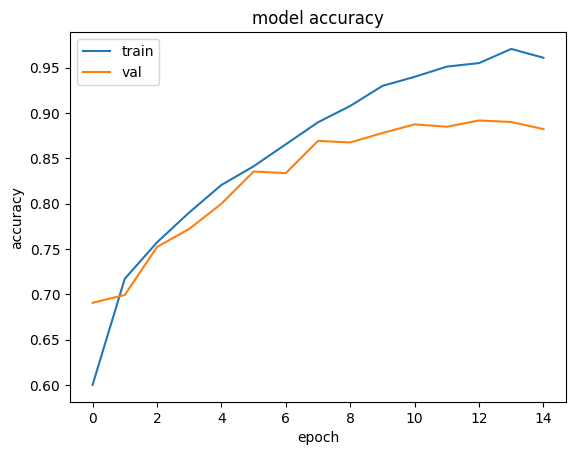

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [130]:
def preprocess_image(img):
  img=Image.open(img)
  img = img.convert('RGB')
  img=img.resize((64,64))
  img=np.expand_dims(img,axis=0)
  img=np.array(img)
  img=img/255
  return img

In [136]:
image=preprocess_image('/content/02_0206065.PNG')
prediction=np.argmax(model.predict(image))
if prediction==1:
  print('forgeries')
else:
  print('genuine')

1/1 [==============================] - 0s 19ms/step
forgeries


In [137]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
